In [3]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load Dataset

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

# Summarize the Dataset

## Statistical Summary

In [6]:
#for describe the dataset we can use describe()
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Class Distribution

In [7]:
# for see the number od instaanse we use groupby and size
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data Visualization

## Univariate Plots

sepal-length       Axes(0.125,0.53;0.352273x0.35)
sepal-width     Axes(0.547727,0.53;0.352273x0.35)
petal-length       Axes(0.125,0.11;0.352273x0.35)
petal-width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

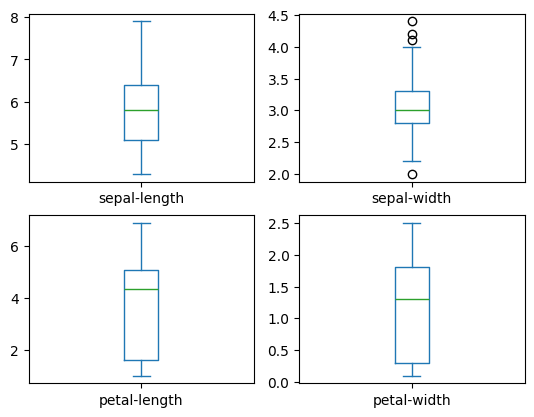

In [10]:
# for see the distribution of each attribute we can use boxplot
dataset.plot(kind="box" , subplots=True , layout=(2,2) ,sharex=False , sharey=False)

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

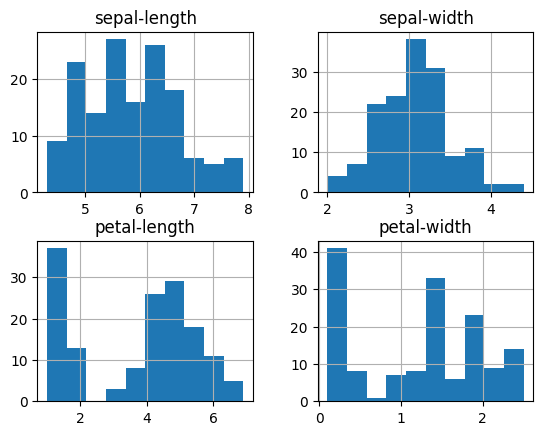

In [11]:
# or create a histogram
dataset.hist()

## Multivariate Plots


array([[<Axes: xlabel='sepal-length', ylabel='sepal-length'>,
        <Axes: xlabel='sepal-width', ylabel='sepal-length'>,
        <Axes: xlabel='petal-length', ylabel='sepal-length'>,
        <Axes: xlabel='petal-width', ylabel='sepal-length'>],
       [<Axes: xlabel='sepal-length', ylabel='sepal-width'>,
        <Axes: xlabel='sepal-width', ylabel='sepal-width'>,
        <Axes: xlabel='petal-length', ylabel='sepal-width'>,
        <Axes: xlabel='petal-width', ylabel='sepal-width'>],
       [<Axes: xlabel='sepal-length', ylabel='petal-length'>,
        <Axes: xlabel='sepal-width', ylabel='petal-length'>,
        <Axes: xlabel='petal-length', ylabel='petal-length'>,
        <Axes: xlabel='petal-width', ylabel='petal-length'>],
       [<Axes: xlabel='sepal-length', ylabel='petal-width'>,
        <Axes: xlabel='sepal-width', ylabel='petal-width'>,
        <Axes: xlabel='petal-length', ylabel='petal-width'>,
        <Axes: xlabel='petal-width', ylabel='petal-width'>]], dtype=object)

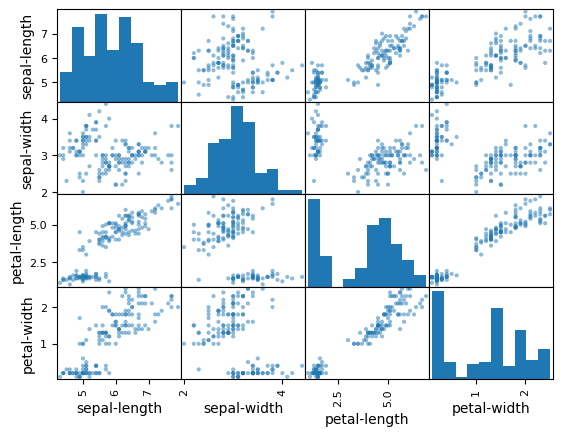

In [12]:
#for see the interaction between attributes we can use scatter_matrix
scatter_matrix(dataset)

# Evaluate Some Algorithms

## Create a Validation Dataset

In [15]:
#we now want tho split the dataset into training and testing sets
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

 ## Build Models

In [17]:
# we will create a list of models to evaluate
# and after we will evaluate each model in turn
# the way that we will evaluate the models is by using cross-validation
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


C:\Users\erfan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\erfan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\erfan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages

## Select Best Model


C:\Users\erfan\AppData\Local\Temp\ipykernel_20792\3731319058.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


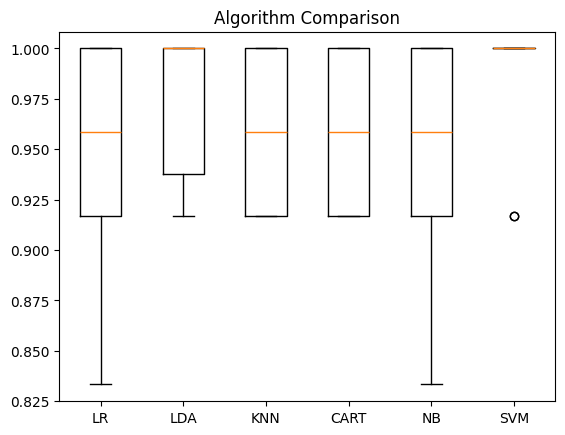

In [ ]:
# now we will create a boxplot to compare the performance of the different models
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#  Make Predictions

## Make Predictions

In [19]:
# now we will train the model
# and make predictions
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [20]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

